In [1]:
from Code.utils import CremaD

In [2]:
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 2

# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
CMD = CremaD(path="./dataset/test/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
dataset = CMD.getData()
dataset

,Path,Emotions
0,./dataset/test/1061_ITH_DIS_XX.wav,disgust
1,./dataset/test/1043_IWL_ANG_XX.wav,angry
2,./dataset/test/1075_IEO_ANG_HI.wav,angry
3,./dataset/test/1052_WSI_DIS_XX.wav,disgust
4,./dataset/test/1025_IEO_FEA_MD.wav,fear
...,...,...
1484,./dataset/test/1027_ITH_SAD_XX.wav,sad
1485,./dataset/test/1035_IWL_ANG_XX.wav,angry
1486,./dataset/test/1033_WSI_NEU_XX.wav,neutral
1487,./dataset/test/1030_IOM_FEA_XX.wav,fear


In [4]:
CMD = CremaD(path="./dataset/test/1043_IWL_ANG_XX.wav", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
waveform, emotion = CMD.getWaveform()
print(waveform.shape)
print(emotion)

(44100,)
0


In [5]:
dataset["Emotions"].value_counts()

fear       255
disgust    254
angry      254
happy      254
sad        254
neutral    218
Name: Emotions, dtype: int64

# Train Test Data Split

In [5]:
# Data splitting
from sklearn.model_selection import train_test_split
import pandas as pd
X = dataset.drop(columns=["Emotions"])
y = dataset["Emotions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

test = pd.concat([X_test, y_test], axis=1)
train = pd.concat([X_train, y_train], axis=1)
print(f"Test Set Data : {len(test)}")
print(test["Emotions"].value_counts())
print(f"Train Set Data : {len(train)}")
print(train["Emotions"].value_counts())

Test Set Data : 1489
fear       255
happy      254
sad        254
angry      254
disgust    254
neutral    218
Name: Emotions, dtype: int64
Train Set Data : 5953
5953
angry      1017
disgust    1017
happy      1017
sad        1017
fear       1016
neutral     869
Name: Emotions, dtype: int64


In [6]:
# Move data
import os
import shutil

# List of filenames to move
test_list = test["Path"].tolist()
test_list = [i.split('/')[2] for i in test_list]
train_list = train["Path"].tolist()
train_list = [i.split('/')[2] for i in train_list]
# Source directory where the files are currently located
source_dir = './dataset/'
# Destination directory where the files will be moved to
dest_dir = './dataset/test/'
dest_dir2 = './dataset/train/'

# Loop through the file list and move each file to the destination directory
for x in test_list:
    if os.path.isfile(source_dir + x):
        shutil.move(source_dir + x, dest_dir)
        print(f"Moved {x} to {dest_dir}")
    else:
        print(f"{x} does not exist in {source_dir}")

for x in train_list:
    if os.path.isfile(source_dir + x):
        shutil.move(source_dir + x, dest_dir2)
        print(f"Moved {x} to {dest_dir2}")
    else:
        print(f"{x} does not exist in {source_dir}")

Moved 1046_MTI_HAP_XX.wav to ./dataset/test/
Moved 1008_IEO_SAD_HI.wav to ./dataset/test/
Moved 1077_IEO_FEA_LO.wav to ./dataset/test/
Moved 1080_MTI_ANG_XX.wav to ./dataset/test/
Moved 1038_ITS_NEU_XX.wav to ./dataset/test/
Moved 1055_DFA_DIS_XX.wav to ./dataset/test/
Moved 1017_IWW_DIS_XX.wav to ./dataset/test/
Moved 1058_DFA_ANG_XX.wav to ./dataset/test/
Moved 1034_IWW_HAP_XX.wav to ./dataset/test/
Moved 1088_IWW_HAP_XX.wav to ./dataset/test/
Moved 1027_WSI_DIS_XX.wav to ./dataset/test/
Moved 1080_IOM_NEU_XX.wav to ./dataset/test/
Moved 1082_MTI_ANG_XX.wav to ./dataset/test/
Moved 1051_TSI_HAP_XX.wav to ./dataset/test/
Moved 1036_IEO_DIS_LO.wav to ./dataset/test/
Moved 1072_ITS_SAD_XX.wav to ./dataset/test/
Moved 1023_IWW_DIS_XX.wav to ./dataset/test/
Moved 1016_TAI_NEU_XX.wav to ./dataset/test/
Moved 1002_MTI_HAP_XX.wav to ./dataset/test/
Moved 1022_MTI_FEA_XX.wav to ./dataset/test/
Moved 1044_TAI_HAP_XX.wav to ./dataset/test/
Moved 1051_IEO_DIS_MD.wav to ./dataset/test/
Moved 1002

# Exploritory Data Analysis

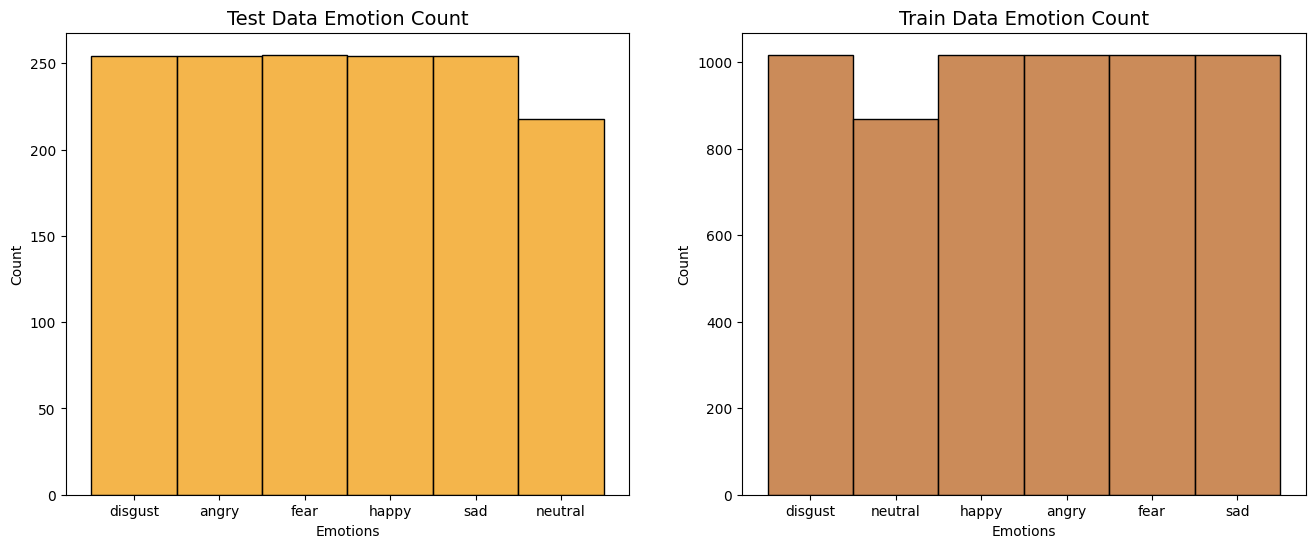

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

test_data = CremaD(path="./dataset/test/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getData()
train_data = CremaD(path="./dataset/train/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getData()

# plot emotion counts
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,6))
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
plt.subplot(1,2,1)
plt.title('Test Data Emotion Count', size = 14)
sns.histplot(test_data.Emotions, color='#F19C0E')
plt.subplot(1,2,2)
plt.title('Train Data Emotion Count', size = 14)
sns.histplot(train_data.Emotions, color='#BA6422')

plt.show()

In [18]:
import pydub
import os

############################### CHECK AUDIO DURATION ###############################

# Set the path to the folder containing the audio files
test_path = "./dataset/test/"
train_path = "./dataset/train/"

# Initialize empty lists to store the duration of each audio file
test_durations, train_duration = [], []

# Loop over each file in the folder and calculate its duration
for filename in os.listdir(test_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(test_path, filename)
        audio = pydub.AudioSegment.from_file(file_path)
        duration = len(audio) / 1000
        test_durations.append(duration)

for filename in os.listdir(train_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(train_path, filename)
        audio = pydub.AudioSegment.from_file(file_path)
        duration = len(audio) / 1000
        train_duration.append(duration)

# Calculate and print the minimum, average, and maximum duration
min_duration_test = min(test_durations)
avg_duration_test = sum(test_durations) / len(test_durations)
max_duration_test = max(test_durations)
min_duration_train = min(train_duration)
avg_duration_train = sum(train_duration) / len(train_duration)
max_duration_train = max(train_duration)

print(f"Minimum test duration: {min_duration_test:.2f} s")
print(f"Average test duration: {avg_duration_test:.2f} s")
print(f"Maximum test duration: {max_duration_test:.2f} s")
print("\n")
print(f"Minimum train duration: {min_duration_train:.2f} s")
print(f"Average train duration: {avg_duration_train:.2f} s")
print(f"Maximum train duration: {max_duration_train:.2f} s")

Minimum test duration: 1.33 s
Average test duration: 2.54 s
Maximum test duration: 5.00 s


Minimum train duration: 1.27 s
Average train duration: 2.54 s
Maximum train duration: 4.97 s


AudioMetaData(sample_rate=16000, num_frames=40040, num_channels=1, bits_per_sample=16, encoding=PCM_S)


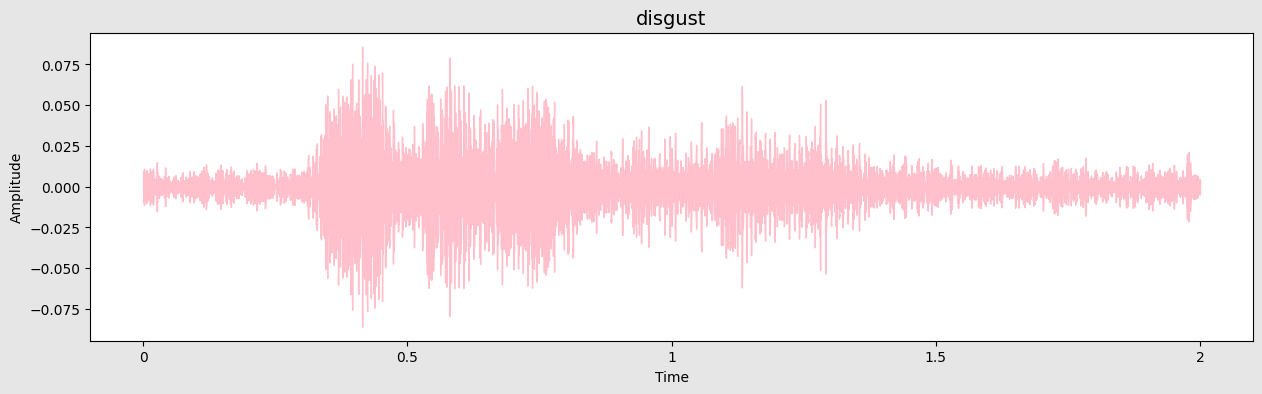

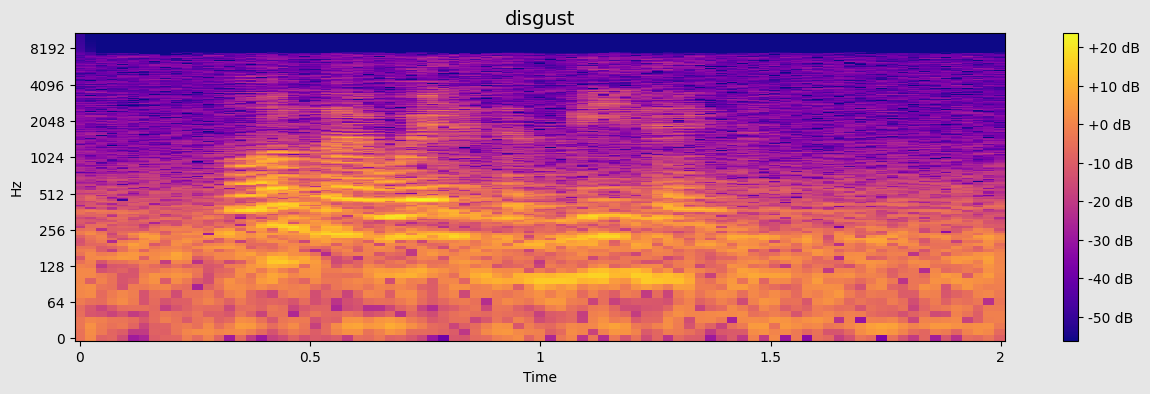

In [1]:
from Code.utils import CremaD
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 2
CMD = CremaD(path="./dataset/test/1066_IOM_DIS_XX.wav", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

CMD.audio_info()
CMD.play_audio()
CMD.plot_waveform()
CMD.plot_spectogram()

# Feature Extraction

### Deep Learning Features

Waveforms:
 Processed 1/1 waveforms

Features set: 1 total, 1 samples
Features (MFC coefficient matrix) shape: 40 mel frequency coefficients x 87 time steps


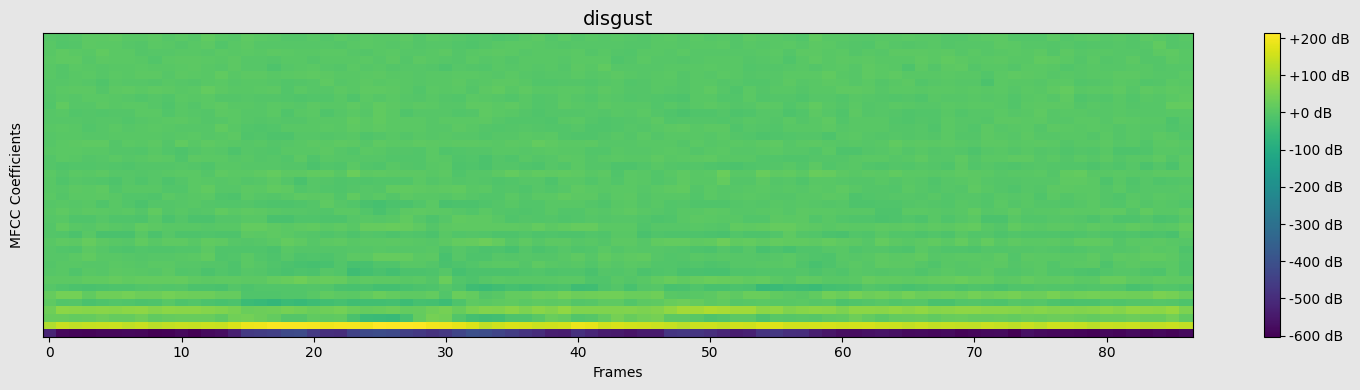

In [1]:
from Code.utils import CremaD
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 2
CMD = CremaD(path="./dataset/test/1066_IOM_DIS_XX.wav", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

CMD.plot_mfcc()

### Conventional ML Features

In [2]:
from Code.utils import CremaD
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 2
CMD = CremaD(path="./dataset/test/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

fitur = CMD.extract_audio_svm()
fitur

 Processed 1489/1489 audio samples

Waveforms:
 Processed 1489/1489 waveforms

Features set: 1489 total samples
Features (MFC coefficient matrix) shape: 40 mel frequency coefficients x 87 time steps


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Emotions
0,-510.145493,147.843106,-3.001141,47.416554,-12.175379,28.241065,-15.903032,9.046559,-5.242177,4.179621,...,-3.253526,3.102386,-4.147664,0.444120,-2.079077,-0.330034,1.282367,-1.755373,0.807840,disgust
1,-408.473154,139.678954,-3.215869,32.195931,-30.564063,3.008298,2.261093,-6.094281,-15.764397,0.695954,...,-3.632861,0.413536,-0.718076,-2.114674,-1.749569,-0.654510,0.342789,-1.602798,2.850474,angry
2,-376.545752,112.430706,-19.837807,32.850927,-26.760270,14.670418,-9.172712,3.063407,-9.208245,-1.349627,...,-2.413476,1.279348,-1.147009,2.429112,0.544988,1.009709,2.683019,1.225772,-0.241027,angry
3,-521.527271,149.047427,10.512400,54.569418,-21.023847,21.594754,-20.215530,7.430696,-12.505321,-1.173086,...,-3.359223,2.822830,-2.427249,1.235749,0.124346,2.837899,1.970052,-1.845187,1.845513,disgust
4,-551.065284,146.166553,10.304032,61.395193,-16.647372,35.582617,-7.719236,11.753813,-9.515547,3.764770,...,-2.710430,4.536504,-1.577264,2.132419,0.125950,2.936521,2.180621,-0.943191,1.954316,fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,-540.711368,145.676368,9.469664,58.711815,-12.485789,31.104111,-14.327648,10.264121,-2.979531,2.433227,...,-0.535143,4.390792,-2.694013,2.073928,0.122682,0.867143,1.450298,-0.164516,3.393762,sad
1485,-428.423655,114.080685,0.550200,25.998148,-12.409287,2.185722,-6.485210,-0.647740,-10.710941,-0.685808,...,-2.843721,1.067048,-1.311987,0.037282,-0.105528,-0.723024,-1.090813,-1.408652,1.347788,angry
1486,-510.445069,106.203187,-1.957740,33.642063,-13.919745,1.343552,-6.555490,2.791151,-5.953743,0.664655,...,-1.232246,3.085844,-0.666687,1.233993,0.426327,-1.454775,1.281845,0.809143,0.859050,neutral
1487,-543.815060,143.662341,28.904945,60.796240,-7.601529,19.922997,-11.645202,1.297636,-9.725953,-3.887576,...,-4.784674,-0.093479,-1.300743,-0.245319,0.305184,-0.284681,-1.164239,-2.236938,1.431222,fear


# SVM Model

In [12]:
import pandas as pd
def manual_label_encoder(data):
    mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
    if type(data) == pd.core.series.Series:
        encoded_data = data.map(mapping)
    else:
        encoded_data = [mapping[i] for i in data]

    return encoded_data

def reverse_label_encoder(data):
    mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
    reverse_mapping_dict = {v: k for k, v in mapping.items()}
    return [reverse_mapping_dict[label] for label in data]

In [14]:
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from Code.utils import CremaD

test_path = "./dataset/test/"
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 2

scaler = joblib.load("./Scaler/SVMScaler.joblib")
test_data = CremaD(path=test_path, sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).extract_audio_svm()

test_data['Emotions'] = manual_label_encoder(test_data['Emotions'])

X_test = test_data.drop(labels='Emotions', axis= 1)
y_test = test_data['Emotions']

X_test_scaled = scaler.transform(X_test)

# Load the model from file
loaded_model = joblib.load('./ML_Model/svm_model.sav')
y_pred = loaded_model.predict(X_test_scaled)

y_test_str = reverse_label_encoder(y_test)
y_pred_str = reverse_label_encoder(y_pred)

report=classification_report(y_test_str, y_pred_str)
accuracy=accuracy_score(y_true=y_test_str, y_pred=y_pred_str)

print("\nModel Summary:\n")
print("Model:{}    Accuracy: {:.2f}%".format(type(loaded_model).__name__ , accuracy*100))
print(report)

print("The Model's Prediction ")
print("<<<===========================================>>>")
df = pd.DataFrame({'Actual': y_test_str, 'Predict': y_pred_str})
print(df.head(20))

# Compute the confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str)


 Processed 1489/1489 audio waveforms

Waveforms:
 Processed 1489/1489 waveform features

Features set: 1489 total samples
Features (MFC coefficient matrix) shape: 40 mel frequency coefficients x 87 time steps

Model Summary:

Model:SVC    Accuracy: 49.76%
              precision    recall  f1-score   support

       angry       0.66      0.64      0.65       254
     disgust       0.47      0.44      0.45       254
        fear       0.44      0.36      0.39       255
       happy       0.46      0.43      0.45       254
     neutral       0.42      0.46      0.44       218
         sad       0.52      0.64      0.57       254

    accuracy                           0.50      1489
   macro avg       0.49      0.50      0.49      1489
weighted avg       0.50      0.50      0.49      1489

The Model's Prediction 
<<<===========================================>>>
     Actual  Predict
0     happy    happy
1     angry    angry
2     angry    happy
3     angry  disgust
4   disgust    angry
5

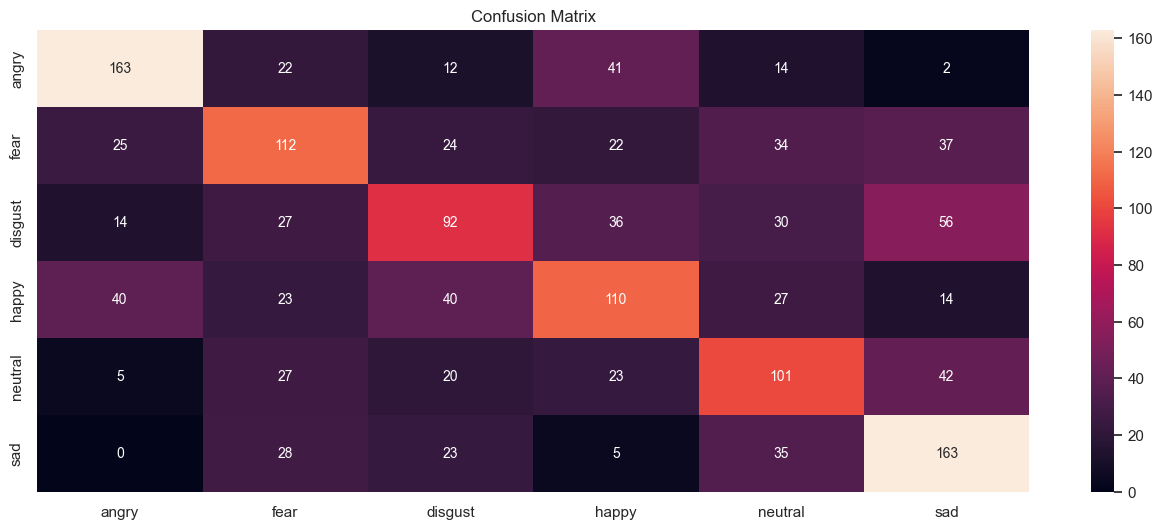

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# set labels for matrix axes from emotions
emotion_list = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(cm, index=emotion_list, columns=emotion_list)

# plot confusion matrices
plt.figure(figsize=(16,6))
sns.set(font_scale=1)
plt.title('Confusion Matrix')
sns.heatmap(confmatrix_df, annot=True, annot_kws={"size": 10}, fmt="d")

plt.show()

In [1]:
from Code.utils import load_model

load_model("./dataset/test/1089_DFA_ANG_XX.wav", "svm_model.sav").getModelPrediction()



Waveforms:
 Processed 1/1 waveform features

Features set: 1 total samples
Features (MFC coefficient matrix) shape: 40 mel frequency coefficients x 87 time steps


{'angry': 0.5409090702117689,
 'fear': 0.15698556832545182,
 'disgust': 0.10173607709204911,
 'happy': 0.1934624580618457,
 'neutral': 0.0032771971226915634,
 'sad': 0.0036296291861929}

# CNN Model

In [1]:
from Code.utils import CremaD
from Code.utils import Transformation
from Code.cnn import CNNNetwork
from torch.utils.data import DataLoader
from torch import nn
import torch
import librosa
import numpy as np

In [7]:
def awgn_augmentation(waveform, multiples=2, bits=16, snr_min=15, snr_max=30): 
    
    # get length of waveform (should be 3*48k = 144k)
    wave_len = len(waveform)
    
    # Generate normally distributed (Gaussian) noises
    # one for each waveform and multiple (i.e. wave_len*multiples noises)
    noise = np.random.normal(size=(multiples, wave_len))
    
    # Normalize waveform and noise
    norm_constant = 2.0**(bits-1)
    norm_wave = waveform / norm_constant
    norm_noise = noise / norm_constant
    
    # Compute power of waveform and power of noise
    signal_power = np.sum(norm_wave ** 2) / wave_len
    noise_power = np.sum(norm_noise ** 2, axis=1) / wave_len
    
    # Choose random SNR in decibels in range [15,30]
    snr = np.random.randint(snr_min, snr_max)
    
    # Apply whitening transformation: make the Gaussian noise into Gaussian white noise
    # Compute the covariance matrix used to whiten each noise 
    # actual SNR = signal/noise (power)
    # actual noise power = 10**(-snr/10)
    covariance = np.sqrt((signal_power / noise_power) * 10 ** (- snr / 10))
    # Get covariance matrix with dim: (144000, 2) so we can transform 2 noises: dim (2, 144000)
    covariance = np.ones((wave_len, multiples)) * covariance

    # Since covariance and noise are arrays, * is the haddamard product 
    # Take Haddamard product of covariance and noise to generate white noise
    multiple_augmented_waveforms = waveform + covariance.T * noise
    
    return multiple_augmented_waveforms
def augment_waveforms(waveforms, features, emotions, multiples):
    # keep track of how many waveforms we've processed so we can add correct emotion label in the same order
    emotion_count = 0
    # keep track of how many augmented samples we've added
    added_count = 0
    # convert emotion array to list for more efficient appending
    emotions = emotions.tolist()

    for waveform in waveforms:

        # Generate 2 augmented multiples of the dataset, i.e. 1440 native + 1440*2 noisy = 4320 samples total
        augmented_waveforms = awgn_augmentation(waveform, multiples=multiples)

        # compute spectrogram for each of 2 augmented waveforms
        for augmented_waveform in augmented_waveforms:

            # Compute MFCCs over augmented waveforms
            augmented_mfcc = feature_mfcc(augmented_waveform, sample_rate=SAMPLE_RATE)

            # append the augmented spectrogram to the rest of the native data
            features.append(augmented_mfcc)
            emotions.append(emotions[emotion_count])

            # keep track of new augmented samples
            added_count += 1

            # check progress
            print('\r'+f'Processed {emotion_count + 1}/{len(waveforms)} waveforms for {added_count}/{len(waveforms)*multiples} new augmented samples',end='')

        # keep track of the emotion labels to append in order
        emotion_count += 1
        
        # store augmented waveforms to check their shape
        augmented_waveforms_temp.append(augmented_waveforms)
    
    return features, emotions

In [8]:
# store augmented waveforms to verify their shape and random-ness
augmented_waveforms_temp = []

# specify multiples of our dataset to add as augmented data
multiples = 2

print('Train waveforms:') # augment waveforms of training set
features_train , y_train = augment_waveforms(X_train, features_train, y_train, multiples)

print('\n\nValidation waveforms:') # augment waveforms of validation set
features_valid, y_valid = augment_waveforms(X_valid, features_valid, y_valid, multiples)

print('\n\nTest waveforms:') # augment waveforms of test set 
features_test, y_test = augment_waveforms(X_test, features_test, y_test, multiples)

# Check new shape of extracted features and data:
print(f'\n\nNative + Augmented Features set: {len(features_train)+len(features_test)+len(features_valid)} total, {len(features_train)} train, {len(features_valid)} validation, {len(features_test)} test samples')
print(f'{len(y_train)} training sample labels, {len(y_valid)} validation sample labels, {len(y_test)} test sample labels')
print(f'Features (MFCC matrix) shape: {len(features_train[0])} mel frequency coefficients x {len(features_train[0][1])} time steps')

Train waveforms:
Processed 4762/4762 waveforms for 9524/9524 new augmented samples

Validation waveforms:
Processed 1191/1191 waveforms for 2382/2382 new augmented samples

Test waveforms:
Processed 1489/1489 waveforms for 2978/2978 new augmented samples

Native + Augmented Features set: 22326 total, 14286 train, 3573 validation, 4467 test samples
14286 training sample labels, 3573 validation sample labels, 4467 test sample labels
Features (MFCC matrix) shape: 40 mel frequency coefficients x 157 time steps


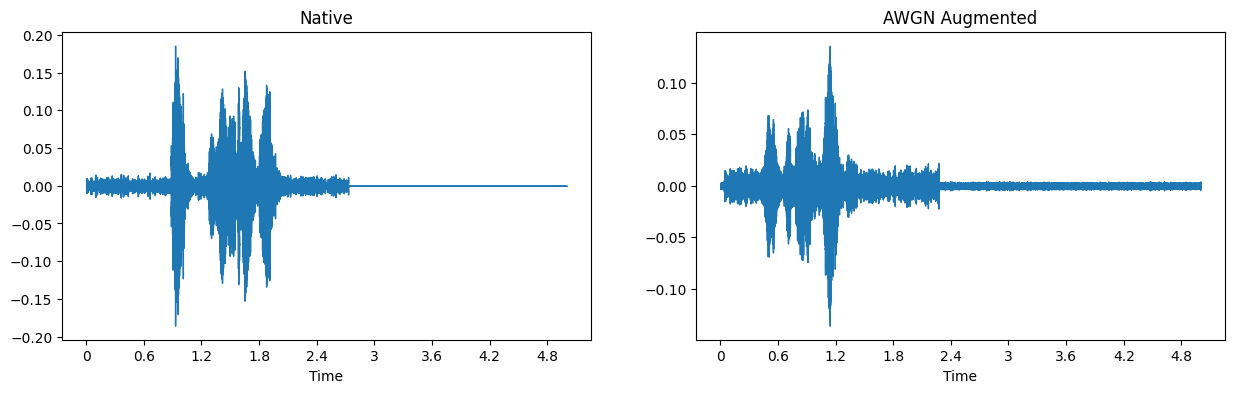

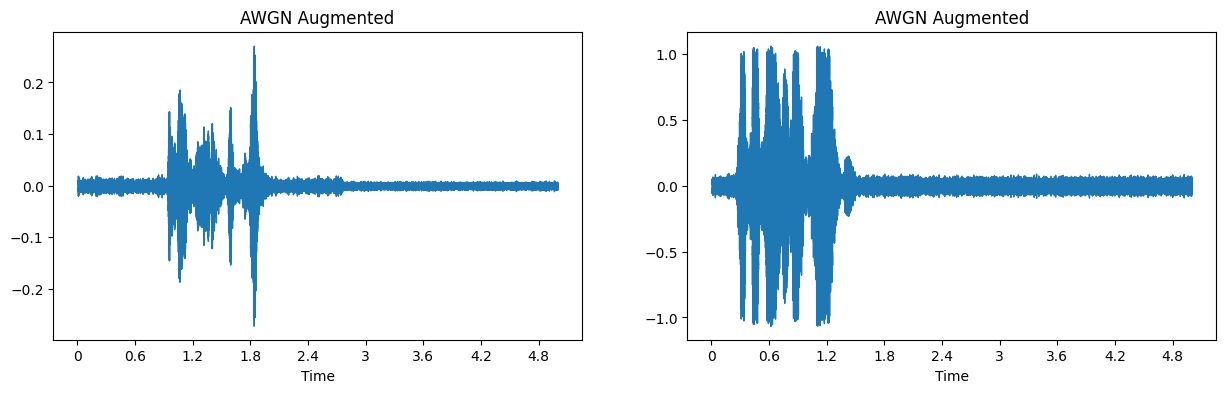

In [12]:
import matplotlib.pyplot as plt
# pick a random waveform, but same one from native and augmented set for easier comparison
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(waveforms_testing[12], sr=SAMPLE_RATE)
plt.title('Native')

plt.subplot(1, 2, 2)
# augmented waveforms are 2D len 1440 list with 2 waveforms in each position
librosa.display.waveshow(augmented_waveforms_temp[0][0], sr=SAMPLE_RATE)
plt.title('AWGN Augmented')
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(augmented_waveforms_temp[2][0], sr=SAMPLE_RATE)
plt.title('AWGN Augmented')

plt.subplot(1, 2, 2)
librosa.display.waveshow(augmented_waveforms_temp[7][0], sr=SAMPLE_RATE)
plt.title('AWGN Augmented')
plt.show()

In [30]:
#################### CREATE READY TO TRAIN DATA ####################
from Code.utils import CremaD

SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 2

test_data = "./dataset/test/"
train_data = "./dataset/train/"

# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
CMD = CremaD(path="plerpler", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
X_train, X_valid, X_test, y_train, y_valid, y_test = CMD.create_readyToTrain_data(test_data=test_data, train_data=train_data)

Path is now ./dataset/test/
 Processed 1489/1489 audio waveforms
Path is now ./dataset/train/
 Processed 5953/5953 audio waveforms

Splitting train and validation data...

Training waveforms:(4762, 44100), y_train:(4762,)
Validation waveforms:(1191, 44100), y_valid:(1191,)
Test waveforms:(1489, 44100), y_test:(1489,)

Train Set Data : 4762
Train Emotion Count
[0 1 2 3 4 5] [814 813 813 813 695 814]
Validation Set Data : 1191
Validation Emotion Count
[0 1 2 3 4 5] [203 203 204 204 174 203]
Test Set Data : 1489
Test Emotion Count
[0 1 2 3 4 5] [254 255 254 254 218 254]

Extracting Train waveforms:
 Processed 4762/4762 waveform features

Extracting Validation waveforms:
 Processed 1191/1191 waveform features

Extracting Test waveforms:
 Processed 1489/1489 waveform features

Extracted Features set: 7442 total, 4762 train, 1191 validation, and 1489 test data
Features shape: 40 mel frequency coefficients x 87 time steps

Shape of 4D feature array for input tensor: (4762, 1, 40, 87) train, (

In [31]:
from Code.utils import CremaD

SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 2

# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
CMD = CremaD(path="./dataset/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
X_train, X_valid, X_test, y_train, y_valid, y_test = CMD.load_readyToTrain_data("./Scaler/deepLearning_ready_data.npy")

Data Loaded with shape:
X_train:(4762, 1, 40, 87), y_train:(4762,)
X_valid:(1191, 1, 40, 87), y_valid:(1191,)
X_test:(1489, 1, 40, 87), y_test:(1489,)


### Training

In [2]:
from Code.utils import DeepLearning
from Code.cnn import CNNNetwork
from Code.LeNet import LeNet

SAMPLE_RATE = 22050
DURATION = 2

path = "./Scaler/deepLearning_ready_data.npy"

# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
DL = DeepLearning(sample_rate=SAMPLE_RATE, duration=DURATION)
train_losses, valid_losses, train_accuracy, valid_accuracy = DL.train(train_file=path, model=CNNNetwork, num_epochs=50)

Data Loaded with shape:
X_train:(4762, 1, 40, 87), y_train:(4762,)
X_valid:(1191, 1, 40, 87), y_valid:(1191,)
X_test:(1489, 1, 40, 87), y_test:(1489,)

cuda selected
Number of trainable params:  338214

Start Training...
Epoch 1: iteration 147/148
Epoch 1 --- loss:1.93, Epoch accuracy:31.12%, Validation loss:1.55, Validation accuracy:35.94%
Epoch 2: iteration 147/148
Epoch 2 --- loss:1.54, Epoch accuracy:38.26%, Validation loss:1.35, Validation accuracy:45.00%
Epoch 3: iteration 147/148
Epoch 3 --- loss:1.45, Epoch accuracy:42.48%, Validation loss:1.41, Validation accuracy:43.91%
Epoch 4: iteration 147/148
Epoch 4 --- loss:1.44, Epoch accuracy:43.05%, Validation loss:1.44, Validation accuracy:43.24%
Epoch 5: iteration 147/148
Epoch 5 --- loss:1.37, Epoch accuracy:45.49%, Validation loss:1.39, Validation accuracy:45.00%
Epoch 6: iteration 147/148
Epoch 6 --- loss:1.36, Epoch accuracy:45.25%, Validation loss:1.34, Validation accuracy:47.27%
Epoch 7: iteration 147/148
Epoch 7 --- loss:1.3

In [2]:
from torch import nn
# define function to create a single step of the training phase
def train_single_epoch(model, optimizer, criterion):
    
    # define the training step of the training phase
    def train_step(X,Y):  
        # forward pass
        output_logits, output_softmax = model(X)
        predictions = torch.argmax(output_softmax,dim=1)
        accuracy = torch.sum(Y==predictions)/float(len(Y))
        
        # compute loss on logits because nn.CrossEntropyLoss implements log softmax
        loss = criterion(input=output_logits, target=Y)
        # loss = criterion(output_logits, Y) 
        
        # compute gradients for the optimizer to use 
        loss.backward()
        
        # update network parameters based on gradient stored (by calling loss.backward())
        optimizer.step()
        
        # zero out gradients for next pass
        # pytorch accumulates gradients from backwards passes (convenient for RNNs)
        optimizer.zero_grad() 
        return loss.item(), accuracy*100
    return train_step

def validate_single_epoch(model, criterion):
    def validate(X,Y):
        # don't want to update any network parameters on validation passes: don't need gradient
        # wrap in torch.no_grad to save memory and compute in validation phase: 
        with torch.no_grad(): 
            # set model to validation phase i.e. turn off dropout and batchnorm layers 
            model.eval()
            # get the model's predictions on the validation set
            output_logits, output_softmax = model(X)
            predictions = torch.argmax(output_softmax,dim=1)
            # calculate the mean accuracy over the entire validation set
            accuracy = torch.sum(Y==predictions)/float(len(Y))
            # compute error from logits (nn.crossentropy implements softmax)
            loss = criterion(input=output_logits, target=Y)
            # loss = criterion(output_logits,Y)
        return loss.item(), accuracy*100, predictions
    return validate

def make_save_checkpoint(): 
    def save_checkpoint(optimizer, model, epoch, filename):
        checkpoint_dict = {
            'optimizer': optimizer.state_dict(),
            'model': model.state_dict(),
            'epoch': epoch
        }
        torch.save(checkpoint_dict, filename)
    return save_checkpoint

def load_checkpoint(optimizer, model, filename):
    checkpoint_dict = torch.load(filename)
    epoch = checkpoint_dict['epoch']
    model.load_state_dict(checkpoint_dict['model'])
    if optimizer is not None:
        optimizer.load_state_dict(checkpoint_dict['optimizer'])
    return epoch

In [3]:
max(valid_accuracy)

56.75902557373047

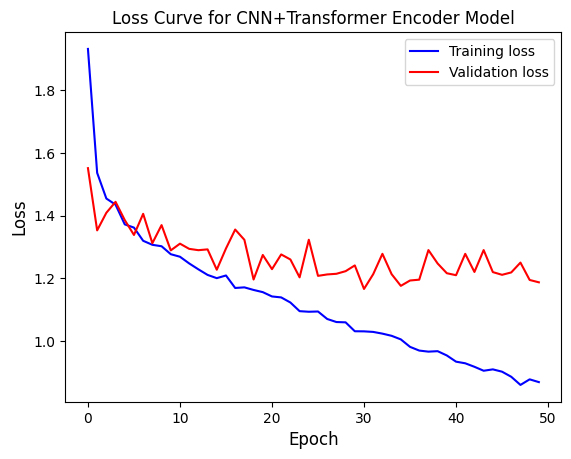

In [4]:
import matplotlib.pyplot as plt
plt.title('Loss Curve for CNN+Transformer Encoder Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.plot(train_losses[:],'b')
plt.plot(valid_losses[:],'r')
plt.legend(['Training loss','Validation loss'])
plt.show()

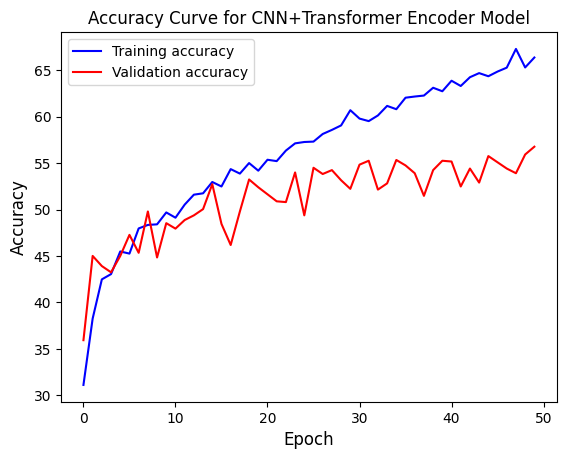

In [5]:
import matplotlib.pyplot as plt

plt.title('Accuracy Curve for CNN+Transformer Encoder Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.plot(train_accuracy[:],'b')
plt.plot(valid_accuracy[:],'r')
plt.legend(['Training accuracy','Validation accuracy'])
plt.show()

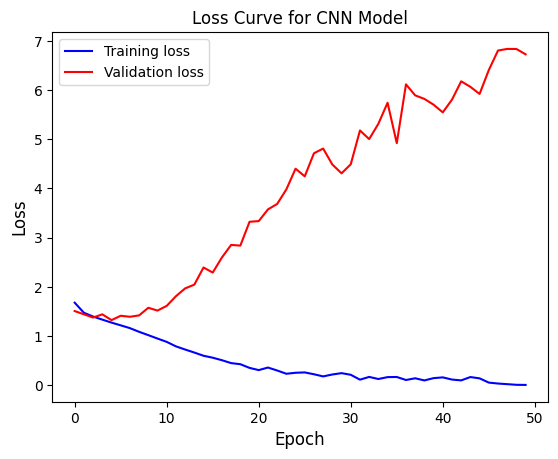

In [6]:
import matplotlib.pyplot as plt
plt.title('Loss Curve for CNN Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.plot(train_losses[:],'b')
plt.plot(valid_losses[:],'r')
plt.legend(['Training loss','Validation loss'])
plt.show()

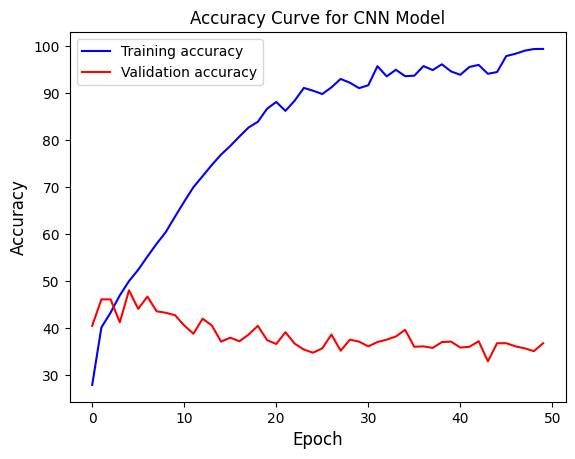

In [7]:
import matplotlib.pyplot as plt

train_accuracy = [tensor.item() for tensor in train_accuracy]
valid_accuracy = [tensor.item() for tensor in valid_accuracy]

plt.title('Accuracy Curve for CNN Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.plot(train_accuracy[:],'b')
plt.plot(valid_accuracy[:],'r')
plt.legend(['Training accuracy','Validation accuracy'])
plt.show()

### Prediction

In [15]:
def train_single_epoch(model, optimizer, criterion):
        # define the training step of the training phase
        def train_step(X,Y):  
            # forward pass
            output_logits, output_softmax = model(X)
            predictions = torch.argmax(output_softmax,dim=1)
            accuracy = torch.sum(Y==predictions)/float(len(Y))
            
            # compute loss on logits because nn.CrossEntropyLoss implements log softmax
            loss = criterion(input=output_logits, target=Y)
            # loss = criterion(output_logits, Y) 
            
            # compute gradients for the optimizer to use 
            loss.backward()
            
            # update network parameters based on gradient stored (by calling loss.backward())
            optimizer.step()
            
            # zero out gradients for next pass
            # pytorch accumulates gradients from backwards passes (convenient for RNNs)
            optimizer.zero_grad() 
            return loss.item(), accuracy*100
        return train_step
    
def validate_single_epoch(model, criterion):
    def validate(X,Y):
        # don't want to update any network parameters on validation passes: don't need gradient
        # wrap in torch.no_grad to save memory and compute in validation phase: 
        with torch.no_grad(): 
            # set model to validation phase i.e. turn off dropout and batchnorm layers 
            model.eval()
            # get the model's predictions on the validation set
            output_logits, output_softmax = model(X)
            predictions = torch.argmax(output_softmax,dim=1)
            # calculate the mean accuracy over the entire validation set
            accuracy = torch.sum(Y==predictions)/float(len(Y))
            # compute error from logits (nn.crossentropy implements softmax)
            loss = criterion(input=output_logits, target=Y)
            # loss = criterion(output_logits,Y)
        return loss.item(), accuracy*100, predictions
    return validate

def make_save_checkpoint(): 
    def save_checkpoint(optimizer, model, epoch, filename):
        checkpoint_dict = {
            'optimizer': optimizer.state_dict(),
            'model': model.state_dict(),
            'epoch': epoch
        }
        torch.save(checkpoint_dict, filename)
    return save_checkpoint

def load_checkpoint( optimizer, model, filename):
    checkpoint_dict = torch.load(filename)
    epoch = checkpoint_dict['epoch']
    model.load_state_dict(checkpoint_dict['model'])
    if optimizer is not None:
        optimizer.load_state_dict(checkpoint_dict['optimizer'])
    return epoch

In [18]:
from Code.cnn import CNNNetwork
from Code.LeNet import LeNet
import torch
from torch import nn
import os
# pick load folder  
load_folder = './Checkpoint/'  

# pick the epoch to load
epoch = '049'
model_name = f'cnnModel-{epoch}.pkl'

# make full load path
load_path = os.path.join(load_folder, model_name)

## instantiate empty model and populate with params from binary 
model = CNNNetwork().to("cuda")
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=0.001, momentum=0.8)
load_checkpoint(optimizer, model, load_path)

print(f'Loaded model from {load_path}')

Loaded model from ./Checkpoint/cnnModel-049.pkl


In [23]:
# reinitialize validation function with model from chosen checkpoint
criterion = nn.CrossEntropyLoss()
validate = validate_single_epoch(model,criterion)

# Convert 4D test feature set array to tensor and move to GPU
X_test_tensor = torch.tensor(X_test,device="cuda").float()
# Convert 4D test label set array to tensor and move to GPU
y_test_tensor = torch.tensor(y_test,dtype=torch.long,device="cuda")

# Get the model's performance metrics using the validation function we defined
test_loss, test_acc, predicted_emotions = validate(X_test_tensor,y_test_tensor)

print(f'Test accuracy is {test_acc:.2f}%')

Test accuracy is 54.53%


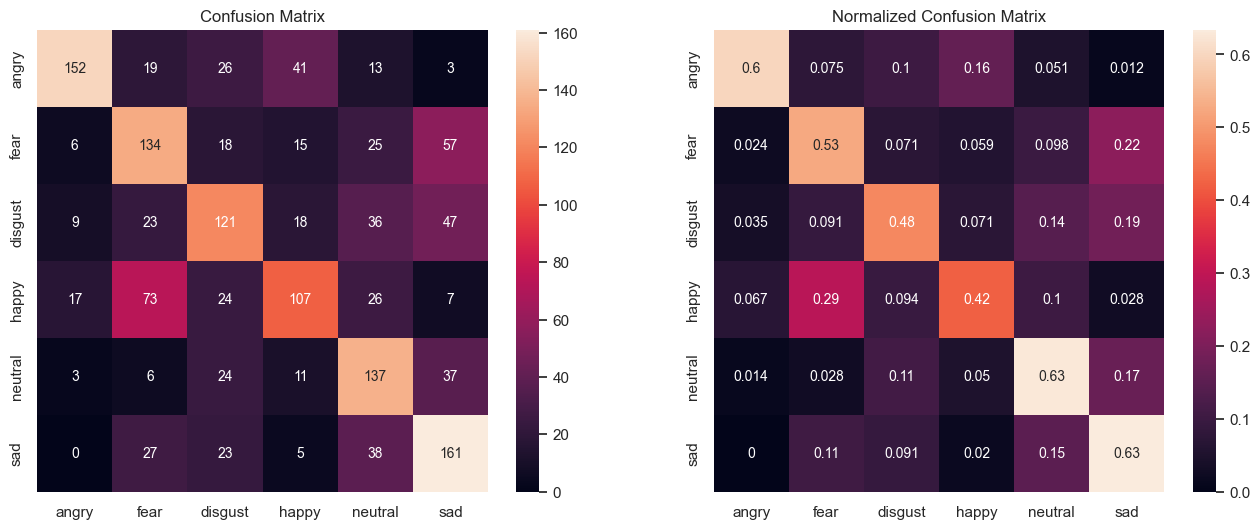

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

emotion_list = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']
# because model tested on GPU, move prediction tensor to CPU then convert to array
predicted_emotions = predicted_emotions.to("cpu").numpy()
# use labels from test set
emotions_groundtruth = y_test

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(emotions_groundtruth, predicted_emotions)
conf_matrix_norm = confusion_matrix(emotions_groundtruth, predicted_emotions,normalize='true')

# set labels for matrix axes from emotions
emotion_names = [emotion for emotion in emotion_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=emotion_names, columns=emotion_names)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=emotion_names, columns=emotion_names)

# plot confusion matrices
plt.figure(figsize=(16,6))
sns.set(font_scale=1)
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sns.heatmap(confmatrix_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sns.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 10})

plt.show()

In [25]:
def feature_mfcc(waveform, sample_rate, n_mfcc = 40, fft = 1024, winlen = 512, window='hamming', mels=128):
    mfc_coefficients=librosa.feature.mfcc(
                        y=waveform, 
                        sr=sample_rate, 
                        n_mfcc=n_mfcc,
                        n_fft=fft, 
                        win_length=winlen, 
                        window=window, 
                        #hop_length=hop, 
                        n_mels=mels, 
                        fmax=sample_rate/2) 
    return mfc_coefficients


def get_features(waveforms, features, sample_rate):

    # initialize counter to track progress
    file_count = 0

    # process each waveform individually to get its MFCCs
    for waveform in waveforms:
        mfccs = feature_mfcc(waveform, sample_rate)
        features.append(mfccs)
        file_count += 1
        # print progress
        print('\r'+f' Processed {file_count}/{len(waveforms)} waveforms',end='')

    # return all features from list of waveforms
    return features

def make_prediction(model, data):
    with torch.no_grad(): 
        model.eval()
        _, output_softmax = model(data)
        return output_softmax

In [32]:
import librosa
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from Code.cnn import CNNNetwork
from Code.LeNet import LeNet
import os
import joblib

############################## LOAD MODEL ##############################
# pick load folder  
load_folder = './Checkpoint/'  

# pick the epoch to load
epoch = '049'
model_name = f'cnnModel-{epoch}.pkl'

# make full load path
load_path = os.path.join(load_folder, model_name)

## instantiate empty model and populate with params from binary 
model = CNNNetwork().to("cuda")
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=0.001, momentum=0.8)
load_checkpoint(optimizer, model, load_path)

print(f'Loaded model from {load_path}')

############################## PRE-PROCESS AUDIO ##############################

features_test = []
emotion_list = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']

audio_file = './dataset/test/1068_WSI_HAP_XX.wav'

waveform, _ = librosa.load(audio_file, duration=2, offset=0.5, sr=22050)
waveform_homo = np.zeros((int(22050*2)))
waveform_homo[:len(waveform)] = waveform

array_wave = np.array(waveform_homo, dtype=np.float64)
m = 1  # number of rows
n = array_wave.shape[0]  # number of columns
X_2d = array_wave.reshape((m, n))
print(X_2d.shape)
features_test = get_features(X_2d, features_test, 22050)

XTest = np.expand_dims(features_test,1)

scaler = joblib.load('./Scaler/CNNScaler.joblib')
BATCH,CHANNEL,WIDTH,HEIGHT = XTest.shape
XTest = np.reshape(XTest, (BATCH,-1))
XTest = scaler.transform(XTest)
XTest = np.reshape(XTest, (BATCH,CHANNEL,WIDTH,HEIGHT))
print(f'Shape of 4D feature array for input tensor: {XTest.shape}')

############################## MAKE PREDICTION ##############################
X_test_tensor = torch.tensor(XTest,device="cuda").float()
predictions = make_prediction(model,X_test_tensor)

output_dict = {}
for i in range(len(emotion_list)):
    output_dict[emotion_list[i]] = predictions[0][i].item()
    
print(output_dict)

Loaded model from ./Checkpoint/cnnModel-049.pkl
(1, 44100)
 Processed 1/1 waveformsShape of 4D feature array for input tensor: (1, 1, 40, 87)
{'angry': 0.08470800518989563, 'fear': 0.10895689576864243, 'disgust': 0.03821869567036629, 'happy': 0.7402436137199402, 'neutral': 0.026060475036501884, 'sad': 0.0018123132176697254}
